<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/1.1_strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [14]:
repo='https://github.com/avinashmane/colab.git'
CONFIG_FILE='config.yaml'

#clone report for colab
import yaml,os,sys
if not os.path.exists('./repo') and (os.name!='nt'):
    !git clone $repo repo
    sys.path.append('repo')   

#read config file

with open(CONFIG_FILE if os.name=='nt' 
          else f"repo/{CONFIG_FILE}","r+") as _c:
    cfg=yaml.load(_c,yaml.Loader)
for x in cfg['env'][os.name]: 
    os.environ[x]=cfg['env'][os.name][x]
    globals()[x]=cfg['env'][os.name][x]

#setup environment
if os.name=='nt':
    # LIB= r'c:\m\lib'
    # LOG= r'c:\m\social-media-automation'
    # AUTH= r'c:\i\auth'
    sys.path.append(LIB)
else:
    !apt update
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    # LIB='/content/drive/MyDrive/m/lib'
    # LOG='/content/drive/MyDrive/m/lib'
    # AUTH='/content/drive/MyDrive/m/auth'
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    sys.path.append("repo/lib")
sys.path.append(LIB)

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Reading package lists... Done
Building dependency tree       
Reading state infor

In [15]:
import importlib
import utils
importlib.reload(utils)
utils.setup_env(cfg['packages'],cfg['modules'])

['nerodia', 'pygsheets']


'Module nerodia : 0.14.1 already installed'

'Module pygsheets : 2.0.5 already installed'

'package chromium-chromedriver already installed'

'Environment setup'

## Code

In [16]:
import yaml
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image, Markdown
import pandas as pd

import utils

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite


In [17]:
"reach gsheet"

import gsheets
Gsheet=gsheets.Gsheet


In [18]:
df_mc=Gsheet(cfg['sheets']['stravasync']['url']).getSheetDf(cfg['sheets']['stravasync']['tab'],start='A10')

# ssl=Gsheet('stravasync')
# df_mc

# Process
## Create headless

In [19]:
" Test Selenium headless"
if True:
    if os.name=='nt':
        b=Browser('chrome',)
    else:
        
        # import sys
        # sys.path.insert(0,f'{DIR}/geckodriver')
        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    
    utils.setLogger(f"{LOG}/strava-automation.log")
    

2022-09-01 05:53:08:INFO:Logger file: /content/drive/MyDrive/m/lib/strava-automation.log


In [20]:

strava=Strava(b,authFile=f'{AUTH}/auth.yaml',cfgFile=f"{LIB}/cfg_strava.yaml",delay=.5)
strava.logGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('StravaPromoLog')
strava.StravaMembers=df_mc.query('strava=="strava"').id.values

sessionGSheet = Gsheet(cfg['sheets']['StravaPromoLog']['url']).getSheetByTitle('SessionLog')

In [21]:
# strava.login("avinash")

# Image(b.screenshot.png())

## A. Give likes in feed

# b.goto('https://www.strava.com/clubs/196654/recent_activity')

# strava.scrolldown(9)

# logging.info(f"Total number of cards on {strava.browser.title}: {len(b.divs(class_name=re.compile('^EntryHeader')))}")

# strava.giveKudos()

In [22]:
# strava.logout()

#  Mileage Certificates

In [23]:
strava.login("mileage_league_strava")

2022-09-01 05:55:33:INFO:Logged in with mileage.league@gmail.com


In [24]:
certSheet=Gsheet(cfg['sheets']['certs']['url'])
certTab=certSheet.getSheetByTitle(cfg['sheets']['certs']['tab'])
df_cert=certTab.get_as_df().query("comment_text!='' and Activity==''"
                                   ).reset_index()
cols={x:df_cert.columns.get_loc(x)+1 for x in ['comment_ts','comment_text']}
# display(cols)
# merge
_df=df_cert.merge(df_mc[['Email','profile','strava']],on='Email')

/usr/local/lib/python3.7/dist-packages/pygsheets/worksheet.py:1477: UserWarning: At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.
  warnings.warn('At least one column name in the data frame is an empty string. If this is a concern, please specify include_tailing_empty=False and/or ensure that each column containing data has a name.')


In [27]:
_df['index 	CertType 	Email 	Milestone 	Name 	Date 	ID 	Team	comment_ts 	Activity 		profile 	strava'.split()]

,index,CertType,Email,Milestone,Name,Date,ID,Team,comment_ts,Activity,profile,strava
0,1174,RunDays,dmanojk2004@yahoo.co.in,150,Manoj Kulkarni,8/27/2022,1jLX5LtsxRgzQau5IZK7MM4k1-8RQ5r-S,P,,,,strava
1,1176,Everests,mahendra.kadam20@gmail.com,1,Mahendra Kadam,8/28/2022,1H3JT4iLwEZmOOKDN2PRMK_aym9XRV6PN,N,,,,strava
2,1177,Everests,manojhere@gmail.com,2,Manoj Vazarkar,8/28/2022,1RRS64qL9wlIBRR9ItfvL7FurU-Az3b5D,N,,,,strava
3,1178,CyclingDist,waliaunmesh@gmail.com,9000,Unmesh Ahluwalia,8/28/2022,15Bq99owHw1XHH2Ce0-vZWgSoh-0x7nYM,N,,,,strava
4,1179,Everests,aminsharp@gmail.com,3,Amin Shaikh,8/28/2022,101RC425MkDD7dYdskFEqGqMyVF4FihUS,A,,,,strava
5,1192,RunDist,paradkaromkar05@gmail.com,2000,Omkar Paradkar,8/29/2022,1VYJ8dx-MJUMEm0SHhwgFVbDHoa6Rhm29,N,29-Aug,,,strava
6,1194,Everests,jpeeprakash1969@gmail.com,4,PRAKASH JP,8/30/2022,1jBmWD9hP_ED5UKekLSe--1A9fyXj0c_Y,N,,,,strava
7,1195,Everests,karthik12321@gmail.com,1,Karthik Radhakrishnan,8/30/2022,1L0vEt1Mj-Pjj4R4iOMwGym5HnGYba0W0,A,,,,strava
8,1196,Everests,pravin198425@gmail.com,2,Patil Pravin,8/30/2022,1HiZRrNn1huhrTl3MjaqfkfWqxBo7N42F,A,,,,strava
9,1203,RunDays,poonamkamboj@gmail.com,100,Poonam Kamboj,8/31/2022,1xaqU-P5FePpzVe1CE5WGOXETSPkqBaIw,P,,,,strava


In [26]:

from pprint import pprint as pp

for i,cert in _df.query("strava=='strava'").iterrows():
    # print (cert['index'],cert.profile,cert.comment_text)

    try:
    
        if not cert.profile: 
            logging.warning(f"{cert.Row},{cert.Name},{cert.profile} : {cert['index']} no profle")
            continue
        b.goto(cert.profile)
        # url=f"https://www.strava.com/activities/{x['activity_id']}"
        certTab.update_values(crange=(cert.Row,cols['comment_ts']),
                         values=[[pd.Timestamp.now().isoformat(),cert.profile]])
        # acts=strava.getReactProps(strava.browser.divs(class_name="react-feed-component"))
        # for x in acts[:3]:
        if True:
            # if not 'activity_id' in x: continue
            # pp(x,depth=1)
            # pp({_a:x[_a] for _a in """type
            #         activity_id
            #         athlete_id
            #         athlete_name""".split()},depth=1,indent=2)
            # b.goto(url+"#comments")

#             _el = b.div(data_testid="comments-form",
#                        )

#             ta=_el.textarea().wait_until(timeout=5,method=lambda x:x.exists)
#             # ta.value=cert.comment_text
#             postButton=_el.button(data_testid='post-comment-btn').wait_until(timeout=1,method=lambda x:x.exists)
#             postButton.execute_script("arguments[0].click();", postButton)
            commentEl=b.button(data_testid="comment_button")
            strava.postComment(commentEl,cert.comment_text)
            logging.info(f"{cert.Row},{cert.Name},{cert.profile} :{cert.comment_text}")

            # break
    except Exception as e:
        logging.error(f"{cert.Row},{cert.Name},{cert.profile} : {e!r} ")
        # raise Exception("Something went wrong while posting comment")
        continue


2022-09-01 05:55:34:WARNING:1176,Manoj Kulkarni, : 1174 no profle
2022-09-01 05:55:34:WARNING:1178,Mahendra Kadam, : 1176 no profle
2022-09-01 05:55:34:WARNING:1179,Manoj Vazarkar, : 1177 no profle
2022-09-01 05:55:34:WARNING:1180,Unmesh Ahluwalia , : 1178 no profle
2022-09-01 05:55:34:WARNING:1181,Amin Shaikh, : 1179 no profle
2022-09-01 05:55:34:WARNING:1194,Omkar Paradkar, : 1192 no profle
2022-09-01 05:55:34:WARNING:1196,PRAKASH JP, : 1194 no profle
2022-09-01 05:55:34:WARNING:1197,Karthik Radhakrishnan, : 1195 no profle
2022-09-01 05:55:34:WARNING:1198,Patil Pravin, : 1196 no profle
2022-09-01 05:55:34:WARNING:1205,Poonam Kamboj, : 1203 no profle
2022-09-01 05:55:34:WARNING:1206,Randhir Padwal, : 1204 no profle


# B. Give likes on Club

### avinash Feed Likes

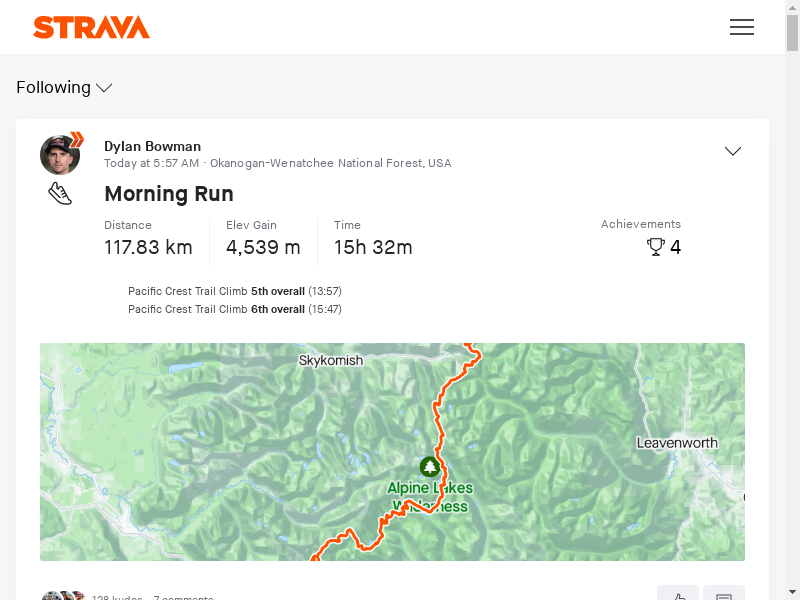

2022-09-01 05:53:26:INFO:Total number of cards on avinash/Dashboard | Strava: 59
2022-09-01 05:53:30:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/1596921 Dylan Bowman,https://www.strava.com/activities/7734764721 Morning Run
2022-09-01 05:53:33:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/52933707 Kelly Humphreys,https://www.strava.com/activities/7734783186 Afternoon Run home from work
2022-09-01 05:53:36:INFO:giveKudos: 2,24454841,https://www.strava.com/athletes/24454841 Vivek Chaudhari 🇮🇳,https://www.strava.com/activities/7734808745 Morning Walk
2022-09-01 05:53:38:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/8598945 Anupam Khanduja,https://www.strava.com/activities/7734706607 Brasstown
2022-09-01 05:53:40:INFO:giveKudos: 4,51017407,https://www.strava.com/athletes/51017407 Shweta Jain,https://www.strava.com/activities/7734705299 Morning Walk
2022-09-01 05:53:43:INFO:giveKudos: 5,nonMember,https://www.strava.com/athletes/18858574 Tushar Paig

###  avinash https://www.strava.com/clubs/pcmcrunners Club Likes

2022-09-01 05:53:48:INFO:Total number of cards on https://www.strava.com/clubs/pcmcrunners 'Pimpri-Chinchwad, Maharashtra, India Club | PCMCRunners on Strava': 20
2022-09-01 05:53:49:INFO:giveKudos: 0,38519306,https://www.strava.com/athletes/38519306 Anoopkumar Choudhary,https://www.strava.com/activities/7734792745 Morning Run
2022-09-01 05:53:52:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/73964312 HARIKUMAR B,https://www.strava.com/activities/7734716454 Morning Run
2022-09-01 05:53:54:INFO:giveKudos: 2,10627757,https://www.strava.com/athletes/10627757 Sunpreet Singh Anand,https://www.strava.com/activities/7734742084 Morning Run
2022-09-01 05:53:57:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/29290475 GHANSHYAM UKEY IRONMAN & TIGERMAN,https://www.strava.com/activities/7734786798 Morning Run


###  avinash https://www.strava.com/clubs/pcmcbikers Club Likes

2022-09-01 05:54:02:INFO:Total number of cards on https://www.strava.com/clubs/pcmcbikers 'Pimpri-Chinchwad, Maharashtra, India Club | PCMC Tring Tring on Strava': 20
2022-09-01 05:54:04:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/76224768 Mayur Jsk,https://www.strava.com/activities/7734789177 Today's Morning Ride & session 🚴🧘🧎🤸


###  avinash https://www.strava.com/clubs/punecycling Club Likes

2022-09-01 05:54:09:INFO:Total number of cards on https://www.strava.com/clubs/punecycling 'Pune, Maharashtra, India Club | Strava Pune Cycling on Strava': 20
2022-09-01 05:54:11:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/45571918 Vivek Deshmukh,https://www.strava.com/activities/7734784214 Morning Mountain Bike Ride
2022-09-01 05:54:13:INFO:giveKudos: 1,nonMember,https://www.strava.com/athletes/49064664 Swapnil Kulkarni,https://www.strava.com/activities/7734766159 Night Ride
2022-09-01 05:54:16:INFO:giveKudos: 2,nonMember,https://www.strava.com/athletes/2280643 Ashish Borakhadikar,https://www.strava.com/activities/7734773380 Morning Ride London Loop Zwift
2022-09-01 05:54:18:INFO:giveKudos: 3,nonMember,https://www.strava.com/athletes/74907451 Mayur Deore,https://www.strava.com/activities/7734771642 Morning Ride
2022-09-01 05:54:21:INFO:giveKudos: 4,nonMember,https://www.strava.com/athletes/6885716 A D,https://www.strava.com/activities/7734705262 Morning Ride
2022-09-01

###  avinash https://www.strava.com/clubs/didyouruntoday Club Likes

2022-09-01 05:54:35:INFO:Total number of cards on https://www.strava.com/clubs/didyouruntoday 'Mumbai, Maharashtra, India Club | Did you run today on Strava': 20


###  avinash https://www.strava.com/clubs/PuneWalkers Club Likes

2022-09-01 05:54:39:INFO:Total number of cards on https://www.strava.com/clubs/PuneWalkers 'Pune, Maharashtra, India Club | Pune Walkers on Strava': 20


###  avinash https://www.strava.com/clubs/prettycoolmileagechallenge Club Likes

2022-09-01 05:54:44:INFO:Total number of cards on https://www.strava.com/clubs/prettycoolmileagechallenge 'India Club | Milage Challenge : 2022 in 2022 on Strava': 20
2022-09-01 05:54:47:INFO:giveKudos: 0,nonMember,https://www.strava.com/athletes/66266609 Irfan Khan 🇮🇳,https://www.strava.com/activities/7734707187 Morning Cricket_01Sep22


###  avinash https://www.strava.com/clubs/mileageleague Club Likes

2022-09-01 05:54:52:INFO:Total number of cards on https://www.strava.com/clubs/mileageleague 'Atlanta, Georgia Club | Mileage League: 2022 in 2022 on Strava': 20
2022-09-01 05:54:54:INFO:Logged out


### mileage_league_strava Feed Likes

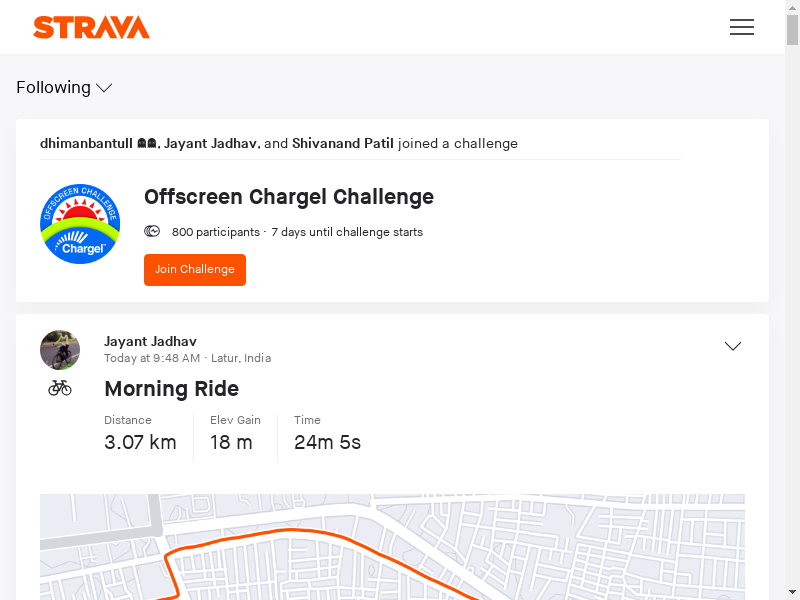

2022-09-01 05:55:08:INFO:Total number of cards on mileage_league_strava/Dashboard | Strava: 59
2022-09-01 05:55:18:WARNING:giveKudos: 0 error clicking TimeoutError("timed out after 10 seconds, waiting for true condition on #<SVG: located: False; {'title': re.compile('.*ive kudos'), 'tag_name': 'button', 'index': 0} --> {'data_testid': 'filled_kudos', 'tag_name': 'svg'}>")
2022-09-01 05:55:18:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2022-09-01 05:55:18:INFO:
Unfortunately, your original traceback can not be constructed.

2022-09-01 05:55:18:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2022-09-01 05:55:18:INFO:
Unfortunately, your original traceback can not be constructed.

2022-09-01 05:55:18:ERROR:Internal Python error in the inspect module.
Below is the traceback from this internal error.

2022-09-01 05:55:18:INFO:
Unfortunately, your original traceback can not be constr

Traceback (most recent call last):
  File "repo/lib/socialmediasite.py", line 217, in giveKudo
    kudoTag.svg(data_testid="filled_kudos").wait_until(method=lambda x: x.exists)
  File "/usr/local/lib/python3.7/dist-packages/nerodia/wait/wait.py", line 111, in wait_until
    object=object)
  File "/usr/local/lib/python3.7/dist-packages/nerodia/wait/wait.py", line 36, in until
    raise TimeoutError(cls._message_for(timeout, object, message))
nerodia.wait.wait.TimeoutError: timed out after 10 seconds, waiting for true condition on #<SVG: located: False; {'title': re.compile('.*ive kudos'), 'tag_name': 'button', 'index': 0} --> {'data_testid': 'filled_kudos', 'tag_name': 'svg'}>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-e335c35e0668>", line 14, 

In [ ]:
# b.goto('https://www.strava.com/clubs/196654/recent_activity')

for _user,_config in {
                    "avinash":"avinash",
                    "mileage_league_strava":"mileage_league_strava",
                    # "strava_pcmcrunners":"strava_pcmcrunners"
                    }.items():
    display(Markdown(f"### {_user} Feed Likes"))
    strava.login(_user)
    display(Image(b.screenshot.png()))
    strava.scrolldown(6) 
    _cards=len(b.divs(class_name=re.compile('^Card')))
    logging.info(f"Total number of cards on {_user}/{strava.browser.title}: {_cards}")
    ret=strava.giveKudos()
    #SessionLog :   Date	SessionType	User	Feed	cards	actions
    sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,'feed',_cards,ret['count']]])
    
    for club in strava.cfg[_config]['clubs']:
      display(Markdown(f"###  {_user} {club} Club Likes"))
      strava.goto(f"{club}/recent_activity")
      _cards=len(b.divs(class_name=re.compile('^Card')))
      logging.info(f"Total number of cards on {club} '{strava.browser.title}': {_cards}")
      ret=strava.giveKudos()
      #SessionLog :   Date	SessionType	User	Feed	cards	actions
      sessionGSheet.append_table([[pd.Timestamp.now().isoformat(),"Kudos",_user,club,_cards,ret['count']]])
    strava.logout()
logging.info(f"All Groups done")    

# End